# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from tkinter import Tk, filedialog, simpledialog
from tkinter.ttk import Combobox

# EXTRACT DATA AND PERFORM TEST

In [2]:
import pandas as pd
from tkinter import Tk, filedialog, simpledialog
from tkinter.ttk import Combobox, Button, Label
import sys  # Import sys module for exit function

# Global variables
df = None
factors = []
response = None
window = None
analysis_performed = False  # Flag to indicate if analysis has been performed

# Read Excel file and perform Two-Way ANOVA
def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a DataFrame
        df = df.dropna(axis=1, how='all')  # Drop entirely blank columns
        return df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

# Define a function to plot main effects
def main_effects_plot(df):
    """Plots main effects based on the DataFrame."""
    if df is None:
        print("DataFrame is empty.")
        return
    
    # Assuming 'Factor' and 'Results' are columns in the DataFrame
    factors_column = 'Factor'
    results_column = 'Results'
    
    # Extract unique factor values
    factors = df[factors_column].dropna().unique()
    
    # Calculate main effects
    main_effects = {}
    for factor in factors:
        # Calculate mean for positive and negative levels of each factor
        mean_plus = df[df[factor] == 1][results_column].mean()
        mean_minus = df[df[factor] == -1][results_column].mean()
        # Compute the main effect as the difference between means
        main_effects[factor] = mean_plus - mean_minus

    # Plot main effects
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(main_effects.keys(), main_effects.values())

    # Annotate the bars with their values
    for factor, value in main_effects.items():
        ax.text(factor, value + 0.01 * abs(value), '{:.2f}'.format(value), ha='center', va='bottom')

    # Set labels and title
    ax.set_ylabel('Main Effect')
    ax.set_title('Main Effects Plot')
    plt.xticks(rotation=45, ha="right")
    plt.show()

import itertools

def perform_two_way_anova(df, factors, response):
    """Performs two-way ANOVA and displays the results."""
    try:
        # Construct formula for Two-Way ANOVA with main effects and interaction
        formula = f'{response} ~ {" + ".join(f"C({factor})" for factor in factors)} + C({factors[0]})*C({factors[1]})'

        # Print Model Formula
        print("\nModel Formula")
        print(formula)
        
        # Perform Two-Way ANOVA
        model = smf.ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        # Print ANOVA Table
        print("\nANOVA Results:")
        print(anova_table)

        # Print Model Summary
        print("\nModel Summary")
        print(model.summary())

    except Exception as e:
        print(f"Error performing two-way ANOVA: {e}")


def analyze_data():
    """Callback function to analyze data."""
    # Get user-selected values from dropdowns
    selected_factors = [factor.get() for factor in factors]
    selected_response = response.get()

    # Perform two-way ANOVA
    perform_two_way_anova(df, selected_factors, selected_response)

    # Plot main effects based on selected factors and response
    main_effects_plot(df, selected_factors, selected_response)

    # Close the Tkinter window
    window.destroy()

    # Exit the script
    sys.exit()


def get_factor_selection():
    """Ask the user for the number of factors."""
    global num_factors
    num_factors = simpledialog.askinteger("Number of Factors", "Enter the number of factors:")

    if num_factors:
        show_factor_selection_popup()

def show_factor_selection_popup():
    """Show the popup for factor and response variable selection."""
    global window, factors, response
    window = Tk()
    window.title("Factor and Response Selection")

    # Create labels and dropdowns for factor selection
    factor_labels = []
    factors = []
    for i in range(num_factors):
        factor_label = Label(window, text=f"Select Factor {i + 1}:")
        factor_label.grid(row=i, column=0)
        
        factor = Combobox(window, values=df.columns.tolist())
        factor.grid(row=i, column=1)
        factors.append(factor)

    # Label and dropdown for response variable selection
    response_label = Label(window, text="Select Response Variable:")
    response_label.grid(row=num_factors, column=0)
    response = Combobox(window, values=df.columns.tolist())
    response.grid(row=num_factors, column=1)

    # Add analyze button
    analyze_button = Button(window, text="Analyze", command=analyze_data)
    analyze_button.grid(row=num_factors + 1, columnspan=2)

    # Start GUI event loop
    window.mainloop()



# Main Effects Plot

In [3]:
def main_effects_plot(df, factors, response):
    """Plots main effects based on the DataFrame."""
    if df is None:
        print("DataFrame is empty.")
        return
    
    # Ensure factors are strings
    factors = [str(factor) for factor in factors]
    
    # Calculate main effects based on response variable
    main_effects = {}
    for factor in factors:
        grouped = df.groupby(factor)[response].mean()
        main_effects[factor] = grouped
    
    # Plot main effects
    fig, ax = plt.subplots(figsize=(10, 6))
    for factor, effects in main_effects.items():
        ax.bar(effects.index, effects.values, label=factor)
    
    ax.set_ylabel('Mean ' + response)
    ax.set_xlabel('Factor Levels')
    ax.set_title('Main Effects Plot')
    ax.legend()
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Main


Model Formula
pain ~ C(gender) + C(drug) + C(gender)*C(drug)

ANOVA Results:
                      sum_sq    df         F    PR(>F)
C(gender)          16.895820   1.0  4.347347  0.055857
C(drug)            63.813651   2.0  8.209725  0.004374
C(gender):C(drug)  15.795485   2.0  2.032114  0.167942
Residual           54.410538  14.0       NaN       NaN

Model Summary
                            OLS Regression Results                            
Dep. Variable:                   pain   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     8.580
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           0.000676
Time:                        14:08:47   Log-Likelihood:                -38.387
No. Observations:                  20   AIC:                             88.77
Df Residuals:                      14   BIC:                             94.75


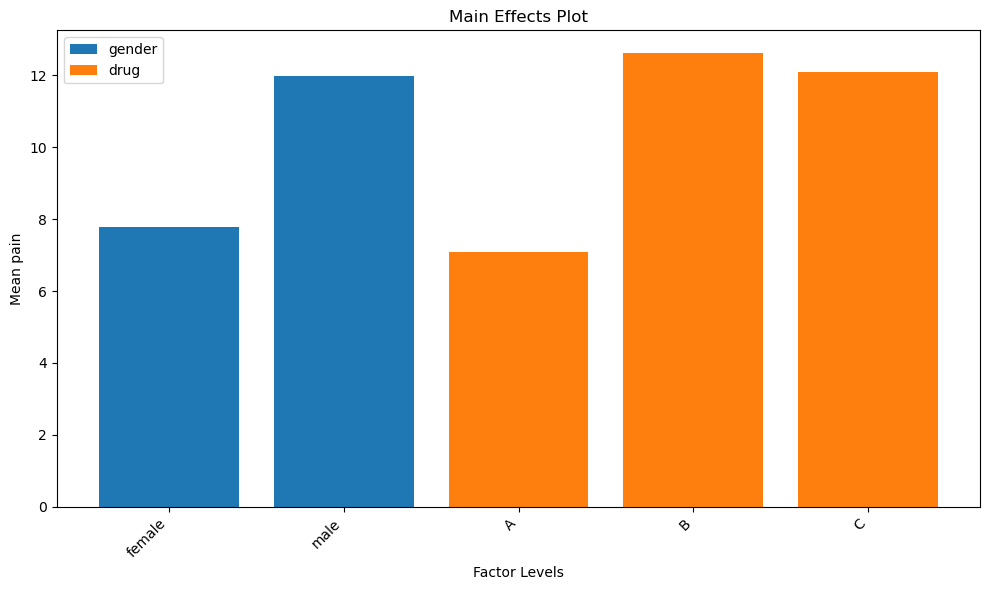

SystemExit: 

c:\Users\ChrisSaid\anaconda3\envs\BiQ_env_20231205\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
def main():
    global df, num_factors, analysis_performed

    # Open a file dialog to select Excel file
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
    if not file_path:
        print("No file selected.")
        return

    # Read Excel file into DataFrame
    df = read_excel_file(file_path)
    if df is None:
        print("Error reading Excel file.")
        return

    # Ask the user for the number of factors
    get_factor_selection()

    # Check if analysis has been performed
    if analysis_performed:
        print("Analysis completed. Plotting main effects...")

        # Get user-selected values from dropdowns
        selected_factors = [factor.get() for factor in factors]
        selected_response = response.get()

        # Perform two-way ANOVA
        perform_two_way_anova(df, selected_factors, selected_response)

        # Plot main effects based on selected factors and response
        main_effects_plot(df, selected_factors, selected_response)

        print("Exiting...")
    else:
        print("Analysis not performed. Exiting...")

if __name__ == "__main__":
    main()